72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0246
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
accuracy within 10% = 0.1951
accuracy within 15% = 0.3005
accuracy within 20% = 0.3638


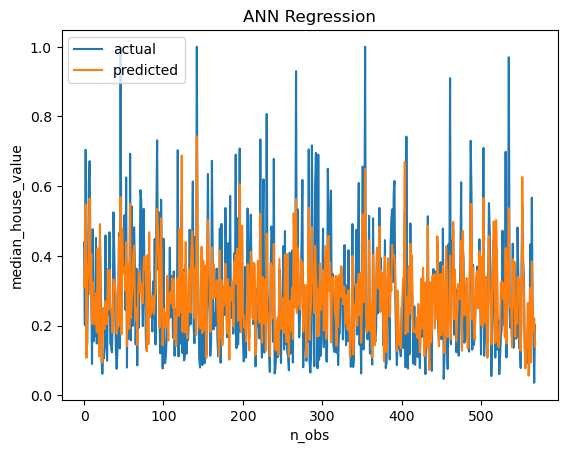

In [4]:
import numpy
import pandas
from statistics import mean

housing_data=pandas.read_csv('C:/Users/000110888/OneDrive - CSULB/Desktop/housing_data.csv')

coding={'<1H OCEAN': 1, 'INLAND': 2, 'NEAR BAY': 3, 'NEAR OCEAN': 4}
housing_data['ocean_proximity']=housing_data['ocean_proximity'].map(coding)

#SCALING VARIABLES TO FALL IN [0,1]
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
scaler_fit=scaler.fit_transform(housing_data)
scaled_housing_data=pandas.DataFrame(scaler_fit, columns=housing_data.columns)

X=scaled_housing_data.iloc[:,0:7].values
y=scaled_housing_data.iloc[:,7].values

#SPLITTING DATA INTO 80% TRAINING AND 20% TESTING SETS
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, 
random_state=449626)

#FITTING AN ARTIFICIAL NEURAL NETWORK
#!pip install keras
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
 
#Defining the input layer and one hidden layer
model.add(Dense(units=3))

#Defining the output neuron
model.add(Dense(units=1, activation='tanh'))
 
#Compiling the model
model.compile(loss='mean_squared_error')
 
#Fitting the ANN to the training set
model.fit(X_train, y_train)

#COMPUTING PREDICTION ACCURACY FOR TESTING DATA
y_pred=model.predict(X_test)

ind10=[]
ind15=[]
ind20=[]     

for sub1, sub2 in zip(y_pred, y_test):
    ind10.append(1) if abs(sub1-sub2)<0.10*sub2 else ind10.append(0)
    ind15.append(1) if abs(sub1-sub2)<0.15*sub2 else ind15.append(0)
    ind20.append(1) if abs(sub1-sub2)<0.20*sub2 else ind20.append(0)
 
#accuracy within 10%
accuracy10=mean(ind10)
print('accuracy within 10% =', round(accuracy10,4))

#accuracy within 15%
accuracy15=mean(ind15)
print('accuracy within 15% =', round(accuracy15,4))

#accuracy within 20%
accuracy20=mean(ind20)
print('accuracy within 20% =', round(accuracy20,4))


#plotting actual and predicted obsevations vs. observation number
import matplotlib.pyplot as plt
  
n_obs=list(range(0,len(y_test)))
plt.plot(n_obs, y_test, label="actual")
plt.plot(n_obs, y_pred, label="predicted")
plt.xlabel('n_obs')
plt.ylabel('median_house_value')
plt.title('ANN Regression')
plt.legend()
plt.show()
